# Assignment 4

### Question 1


(100 Points) Suppose a company thinks there may be a linear relationship between the amount they spend on advertising each month (in thousands of dollars) and the total monthly sales (also in thousands of dollars). Use the data given as:

Use the given gradient descent code and linear regression approach and use it for the table given above. Do you get the same m, b? Discuss the results.

Your Answer:

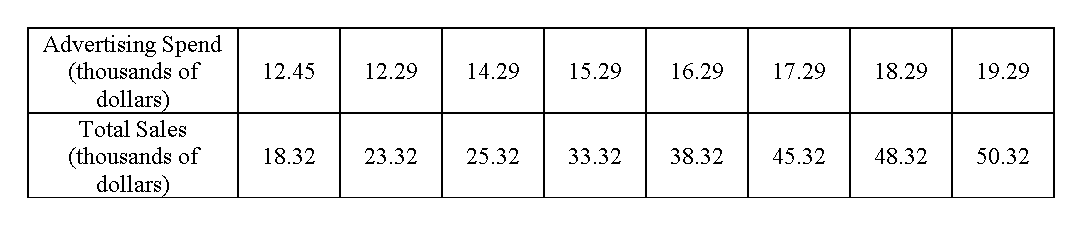


import libraries

In [537]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

prepare data and label name variables

In [538]:
xlabel = "Advertising Spendings (thousands of dollars)"
ylabel = "Total Sales (thousands of dollars)"

x = [12.45, 12.29, 14.29, 15.29, 16.29, 17.29, 18.29, 19.29]
y = [18.32, 23.32, 25.32, 33.32, 38.32, 45.32, 48.32, 50.32]

x = np.array(x)
y = np.array(y)

In [539]:
def get_m_b_r2(x, y):
    sum_x = x.sum()
    sum_y = y.sum()
    sum_xy = (x*y).sum()
    sum_x_squared = (x**2).sum()
    sum_y_squared = (y**2).sum()
    n = x.shape[0]

    b = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared  - sum_x**2)

    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

    r_squared = ((n * sum_xy - sum_x * sum_y)**2) / ((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))

    return m, b, r_squared

time_start = time()
m_base, b_base, r_squared = get_m_b_r2(x,y)
time_base = time() - time_start

print(f'm = {m_base}; b = {b_base}; time taken = ', time_base)

m = 4.619649959203183; b = -37.1392096101019; time taken =  6.818771362304688e-05


In [540]:
def gradient_descent(m_curr, b_curr, learning_rate):
    n = x.shape[0]

    m_change = 2 * (m_curr*(x**2) + b_curr*(x) - x*y).sum() / n
    b_change = 2 * (m_curr*x + b_curr - y).sum() / n  

    m_new = m_curr - learning_rate * m_change
    b_new = b_curr - learning_rate * b_change

    return m_new, b_new

In [541]:
def is_similar(new, old, precision = 1e-7):
    return abs(new - old) < precision

initialize $m$ by using the average slope of the data  
calculate $b$ using the value of  $m$ and mean of $x$ and $y$ values  

Finally update $m$ and $b$ over 100 iterations of gradient descent using 0.001 learning rate.  
Larger value of learning rates fail to converge (was getting very high values and nowhere near expected values)

In [542]:
m = (y.max() - y.min()) / (x.max() - x.min())
b = y.mean() - m*x.mean()

print(f'starting with m={m} and b={b}')

time_start = time()

for i in range(10000):
    m_new, b_new = gradient_descent(m, b, 0.00001)

    if is_similar(m_new, m) and is_similar(b_new, b):
        print('Getting similar values, thus breaking loop at iteration = ', i)
        break

    m, b = m_new, b_new

time_descent = time() - time_start

print(f'Gradient Descent ended with m={m} and b={b}; time taken = ', time_descent)

starting with m=4.571428571428571 and b=-36.38285714285713
Gradient Descent ended with m=4.5727579101706946 and b=-36.386281288660406; time taken =  0.06215715408325195


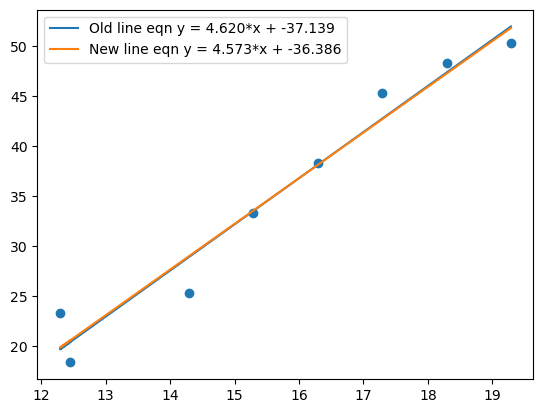

In [543]:
def plot(m,b, line_name):
    plt.plot(x, m*x+b, label=f'{line_name} y = {m:.3f}*x + {b:.3f}')

plt.scatter(x, y)
plot(m_base, b_base, 'Old line eqn')
plot(m, b, 'New line eqn')
plt.legend();

The $m$ and $b$ values from gradient descent are similar to old method but requires careful initialization and computation time. The computation time is due to highly iterative updating (loop for 10k loops) with low learning rate (0.00001). And without careful initalization of the $m$ and $b$ values, as well as finding the correct learning rate, the gradient descent method fails to converge to the expected values. The $m$ and $b$ initalization was easily done here as it was a line but this will get harder for polynomial regression.

### Question 2
Graduate Student Question / BONUS Question for Undergraduate Students (50 Points bonus for undergraduate students)
 
Use the given code gradient descent and linear regression approach, modify for the Stochastic Gradient Descent Method, and use it for the table given above. Do you get the same m, b? Discuss the results


Your Answer:

In [544]:
def stochastic_descent(m_curr, b_curr, learning_rate):
    n = x.shape[0]
    x_random = np.random.choice(x, 1)[0]
    y_random = np.random.choice(y, 1)[0]

    m_change = 2 * (m_curr*(x_random**2) + b_curr*(x_random) - x_random*y_random)
    b_change = 2 * (m_curr*x_random + b_curr - y_random)

    m_new = m_curr - learning_rate * m_change
    b_new = b_curr - learning_rate * b_change

    return m_new, b_new

In [545]:
m_stochastic = (y.max() - y.min()) / (x.max() - x.min())
b_stochastic = y.mean() - m*x.mean()

print(f'starting with m={m_stochastic} and b={b_stochastic}')

time_start = time()

for i in range(10000):
    m_new, b_new = stochastic_descent(m_stochastic, b_stochastic, 0.00001)

    if is_similar(m_new, m) and is_similar(b_new, b):
        print('Getting similar values, thus breaking loop at iteration = ', i)
        break

    m, b = m_new, b_new

time_stochastic = time() - time_start

print(f'Stochastic Descent ended with m={m_stochastic} and b={b_stochastic}; time taken = ', time_stochastic)

starting with m=4.571428571428571 and b=-36.40370782102733
Getting similar values, thus breaking loop at iteration =  136
Stochastic Descent ended with m=4.571428571428571 and b=-36.40370782102733; time taken =  0.0032100677490234375


Stochastic gradient descent produces $m$ and $b$ very similar to gradient descent and also very fast (see below for time taken). But not as fast as the base method. In addition, the issue of initialization of $m$ and $b$ and learning rate selection remains.

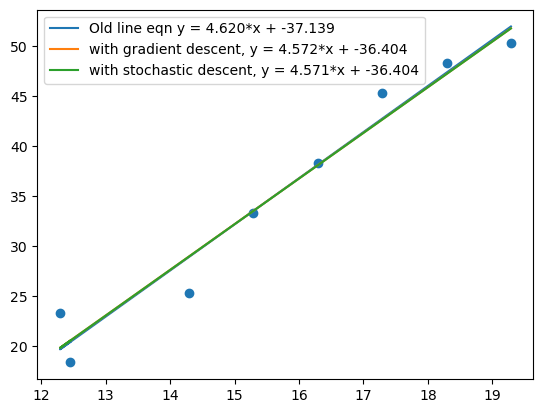

In [546]:
plt.scatter(x, y)
plot(m_base, b_base, 'Old line eqn')
plot(m, b, 'with gradient descent,')
plot(m_stochastic, b_stochastic, 'with stochastic descent,')
plt.legend();

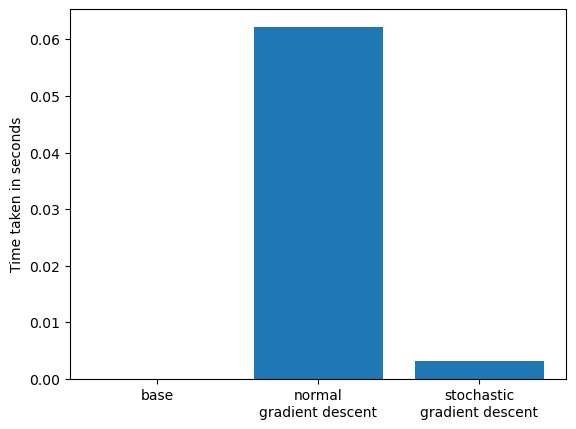

In [547]:
plt.bar(
    ['base','normal\ngradient descent', 'stochastic\ngradient descent'],
    [time_base, time_descent, time_stochastic]
)
plt.ylabel('Time taken in seconds');